![Matrix Image](pictures/DecisionTreeModel/SololearnMachineLearningDecisionTreeModel.png "Matrix general")

![Matrix Image](pictures/DecisionTreeModel/SololearnMachineLearningDecisionTreeMode2.png "Matrix with data")

### Accuracy
$\dfrac{TP+TN}{TF+TN+FP+FN}=\dfrac{233+480}{233+65+109+480}=\dfrac{713}{887}=80.38\%$

### Precision
$\dfrac{TP}{TP + FP}=\dfrac{233}{233 + 65}=0.7819$

### Recall
$\dfrac{TP}{TP + FN}=\dfrac{233}{233 + 109}= 0.6813$

### F1 Score
$2*\dfrac{Precision*Recall}{Precision+Recall}=2*\dfrac{0.7819*0.6813}{0.7819 + 0.6813}=0.7281$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

In [2]:
print("accuracy:\t", accuracy_score(y, y_pred))
print("precision:\t", precision_score(y, y_pred))
print("recall:\t\t", recall_score(y, y_pred))
print("f1 score:\t", f1_score(y, y_pred))

accuracy:	 0.8049605411499436
precision:	 0.7734627831715211
recall:		 0.6988304093567251
f1 score:	 0.7342549923195083


In [3]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[475  70]
 [103 239]]


#### We don't want to test on data that we learned on, so we must split them

In [4]:
from sklearn.model_selection import train_test_split
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
print("whole dataset:\t", X.shape, y.shape)
print("training set:\t", X_train.shape, y_train.shape)
print("test set:\t", X_test.shape, y_test.shape)

whole dataset:	 (887, 6) (887,)
training set:	 (620, 6) (620,)
test set:	 (267, 6) (267,)


In [5]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7827715355805244

In [6]:
y_pred = model.predict(X_test)
print("accuracy:\t", accuracy_score(y_test, y_pred))
print("precision:\t", precision_score(y_test, y_pred))
print("recall:\t\t", recall_score(y_test, y_pred))
print("f1 score:\t", f1_score(y_test, y_pred))

accuracy:	 0.7827715355805244
precision:	 0.71875
recall:		 0.69
f1 score:	 0.7040816326530612


## Data for Titanic
### Sensitivity
$\dfrac{TP}{TP + FP}=Recall=\dfrac{61}{61 + 35}=\dfrac{61}{96}=0.6354$

### Specificity
$\dfrac{TN}{TN + FP}=\dfrac{105}{105 + 21}=\dfrac{105}{126}=0.8333$

In [7]:
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print("sensitivity:\t", sensitivity_score(y_test, y_pred))

sensitivity:	 0.69


In [8]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred))

(array([0.81871345, 0.71875   ]), array([0.83832335, 0.69      ]), array([0.82840237, 0.70408163]), array([167, 100], dtype=int64))


In [9]:
def specificity_score(y_true, y_pred_fce):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred_fce)
    return r[0]
print("specificity:\t", specificity_score(y_test, y_pred))

specificity:	 0.8383233532934131


In [10]:
print('a + b = 1\n', model.predict_proba(X_test)[:5])

a + b = 1
 [[0.4176338  0.5823662 ]
 [0.25611153 0.74388847]
 [0.49115675 0.50884325]
 [0.40737487 0.59262513]
 [0.19267183 0.80732817]]


In [11]:
print(model.predict_proba(X_test)[:24, 1])

[0.5823662  0.74388847 0.50884325 0.59262513 0.80732817 0.81583121
 0.04338601 0.25408965 0.10731548 0.74162465 0.1207374  0.36047783
 0.64634028 0.22684502 0.90620996 0.08588943 0.0828864  0.53743423
 0.21860394 0.45002658 0.72220189 0.15177644 0.13767621 0.23525712]


In [12]:
print("precision 1:\t", precision_score(y_test, y_pred))
print("recall 1:\t", recall_score(y_test, y_pred))
print()
y_pred = model.predict_proba(X_test)[:, 1] > 0.75
print("precision 2:\t", precision_score(y_test, y_pred))
print("recall 2:\t", recall_score(y_test, y_pred))
y_pred_proba = model.predict_proba(X_test)

precision 1:	 0.71875
recall 1:	 0.69

precision 2:	 0.926829268292683
recall 2:	 0.38


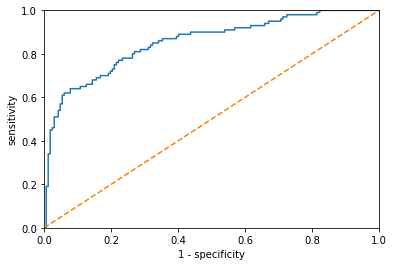

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [14]:
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8530838323353295


## Comparing two models
#### AUC is score for general model, not for single point of threshold etc.

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8926846100759145
model 1 AUC score: 0.8649930986887508


### KFold split

In [16]:
from sklearn.model_selection import KFold
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]
kf = KFold(n_splits=3, shuffle=True)
for train, test in kf.split(X):
    print(train, test)

[1 2 3 5] [0 4]
[0 1 3 4] [2 5]
[0 2 4 5] [1 3]


In [17]:
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)

(array([0, 2, 3, 5]), array([1, 4]))


In [18]:
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("testing set indices:", test_indices)

training set indices: [0 2 3 5]
testing set indices: [1 4]


In [19]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[22.      7.25  ]
 [26.      7.925 ]
 [35.     53.1   ]
 [27.      8.4583]]
[[38.     71.2833]
 [35.      8.05  ]]
[0 1 1 0]
[1 0]


In [20]:
kf = KFold(n_splits=5, shuffle=True)
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8258426966292135


### Finding mean score

In [21]:
scores = []
for train_indices, test_indices in kf.split(X):
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print()
print(np.mean(scores))

[0.8426966292134831, 0.8089887640449438, 0.807909604519774, 0.7853107344632768, 0.7570621468926554]

0.8003935758268266


### Final model

In [22]:
final_model = LogisticRegression()
final_model.fit(X,y)

LogisticRegression()

#### Finally comparing that 2 models

In [23]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare','Age']].values
y = df['Survived'].values

In [24]:
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_indices, test_indices in kf.split(X):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))
    print()

In [25]:
score_model(X1, y, kf)
score_model(X2, y, kf)
score_model(X3, y, kf)

accuracy: 0.797060877293214
precision: 0.7592901203357266
recall: 0.6958606129018772
f1 score: 0.7257671322376832

accuracy: 0.7925411032819145
precision: 0.7440278212542081
recall: 0.7002307692307692
f1 score: 0.7211662453352593

accuracy: 0.6550561797752807
precision: 0.6496605334474397
recall: 0.24065465790419874
f1 score: 0.3427194303573928



In [26]:
model = LogisticRegression()
model.fit(X1, y)
print(model.predict([[3, False, 25, 0, 1, 2]])[0])

1
